In [1]:
from typing import List

import quairkit as qkit
import torch
from quairkit import *
from quairkit.database import *
from quairkit.qinfo import *
from torch import transpose

qkit.set_dtype('complex128')

In [2]:
target_func = lambda x: transpose(x, -1, -2)
ancilla_dim = 27
slot_dim = 3

In [3]:
V_unitary_list: List[Circuit] = torch.load("V_unitary_matrix_transpose_d=3.pt", weights_only=False)

In [4]:
unitary = random_unitary(num_systems=1, system_dim=slot_dim)
psi_in = random_state(num_systems=1, system_dim=slot_dim)

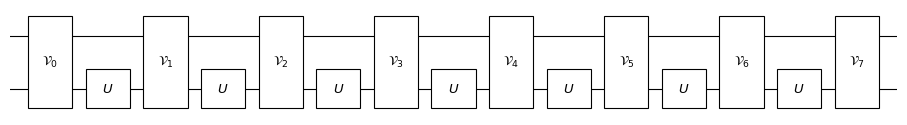

In [5]:
cir = Circuit(system_dim=[ancilla_dim, slot_dim])
for index, V in enumerate(V_unitary_list):
    cir.oracle(V, system_idx=[0, 1], latex_name=f"$\\mathcal{{V}}_{{{index}}}$")
    if index < len(V_unitary_list) - 1:
        cir.oracle(unitary, system_idx=1, latex_name="$U$")
cir.plot()

In [6]:
input_state = qkit.to_state(
    zero_state(num_systems=1, system_dim=ancilla_dim).density_matrix.kron(
        psi_in.density_matrix
    ),
    system_dim=[ancilla_dim, slot_dim],
)
actual_psi_out = cir(input_state).trace([0])
expect_psi_out = psi_in.evolve(target_func(unitary))

In [7]:
fidelity = state_fidelity(actual_psi_out, expect_psi_out)
fidelity.item()

0.9999323257388454

In [8]:
qkit.print_info()


---------VERSION---------
quairkit: 0.2.0
torch: 2.5.1+cu124
torch cuda: 12.4
numpy: 1.26.4
scipy: 1.14.1
matplotlib: 3.9.3
---------SYSTEM---------
Python version: 3.10.15
OS: Linux
OS version: #1 SMP Tue Nov 5 00:21:55 UTC 2024
---------DEVICE---------
CPU:  13th Gen Intel(R) Core(TM) i9-13980HX
GPU: (0) NVIDIA GeForce RTX 4090 Laptop GPU
